In [ ]:
%load ../lsm/__init__.py

In [14]:
LSM(n_exc=1000, n_inh=250, n_rec=500)

In [38]:
nest.ResetKernel()
pos = nest.spatial.grid(
    shape=[15, 3, 3],
    extent = [15,3,3]
)
exc_layer = nest.Create('iaf_psc_alpha', positions=pos)

In [40]:
pos = nest.spatial.grid(
    shape=[8, 2, 2],
    extent = [15,3,3]
)
inh_layer = nest.Create('iaf_psc_alpha', positions=pos)

In [41]:
conndict_exc = {'rule': 'pairwise_bernoulli',
            'p': 1.0, #Connection probability for all nodes that fit inside the mask
            'mask': {'spherical': {'radius': 2.5}}} #the mask used to determine if nodes will be connected

#sdict = {'weight': nest.random.uniform(min=0.2, max=0.8)} #The rule for determining the weights of the synapses

sdict_exc = {'weight': nest.spatial_distributions.exponential(nest.spatial.distance, beta=5.),
         'delay': 0.1 + 0.02 * nest.spatial.distance}

In [42]:
nest.Connect(exc_layer,exc_layer,conndict_exc,sdict_exc)

In [43]:
nest.Connect(exc_layer,inh_layer,conndict_exc,sdict_exc)

In [45]:
sd_exc = nest.Create('spike_recorder', 1)
sd_inh = nest.Create('spike_recorder', 1)
nest.Connect(exc_layer,sd_exc)
nest.Connect(inh_layer,sd_inh)

In [46]:
nest.Simulate(200)


Oct 30 23:52:30 NodeManager::prepare_nodes [Info]: 
    Preparing 171 nodes for simulation.

Oct 30 23:52:30 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 171
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Oct 30 23:52:30 SimulationManager::run [Info]: 
    Simulation finished.


In [47]:
spikes = sd_exc.events

In [48]:
exc_layer[0,2,5]

NodeCollection(metadata=None,
               model=iaf_psc_alpha, size=1, first=1;
               model=iaf_psc_alpha, size=1, first=3;
               model=iaf_psc_alpha, size=1, first=6)

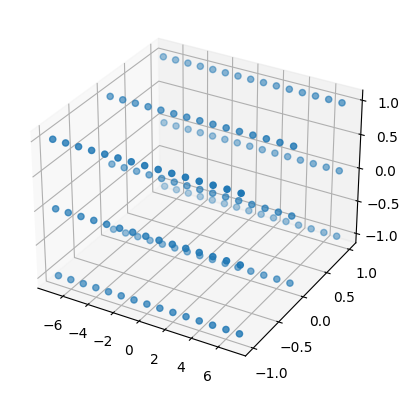

In [50]:
import matplotlib.pyplot as plt

coords = np.array(nest.GetPosition(exc_layer))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=coords[:,0],ys=coords[:,1],zs=coords[:,2])